In [76]:
import os
from os.path import join
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

### Loading face dataset

In [77]:
face_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/ffhq256/ffhq256"

In [78]:
imgid = 100
img = Image.open(join(face_root, f"{imgid:05d}.png"))

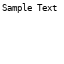

In [79]:
# Create a blank white image
text_img = Image.new('RGB', (64, 64), color='white')
draw = ImageDraw.Draw(text_img)
# Add text to the image
text = "Sample Text"
position = (2, 2)  # Top-left corner coordinates
text_color = (0, 0, 0)  # Black color in RGB
# Use default font since Arial.ttf may not be available
# font = ImageFont.truetype("DejaVuSans.ttf", size=12)  # Choose a font size of 12 pixels
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
draw.text(position, text, fill=text_color, font=font)
text_img

In [80]:
import PIL 
from os.path import join
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append("/n/home12/binxuwang/Github/edm")
from training.dataset import TensorDataset, ImageFolderDataset
edm_dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/EDM_datasets/datasets"
edm_ffhq64_path = join(edm_dataset_root, "ffhq-64x64.zip")
dataset = ImageFolderDataset(edm_ffhq64_path)

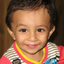

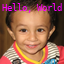

In [107]:
img_id = 10
img = PIL.Image.fromarray(dataset[img_id][0].transpose(1,2,0))
# add text to the image
display(img)
draw = PIL.ImageDraw.Draw(img)
text_color = (255, 0, 255)  # Black color in RGB
# Use default font since Arial.ttf may not be available
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
draw.text((2, 2), "Hello, World!", fill=text_color, font=font)
img

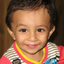

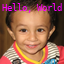

In [110]:
img_id = 10
img = Image.fromarray(dataset[img_id][0].transpose(1,2,0))
# add text to the image
display(img)
draw = ImageDraw.Draw(img)
text_color = (255, 0, 255)  # Black color in RGB
# Use default font since Arial.ttf may not be available
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
draw.text((2, 2), "Hello, World", fill=text_color, font=font)
img

### Add fixed text onto face images

In [112]:
from tqdm import tqdm, trange

In [114]:
# create a new dataset with fixed text on top 
text_color = (255, 0, 255)  # Black color in RGB
# Use default font since Arial.ttf may not be available
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
face_text_img_col = []
for img_id in trange(len(dataset)):
    img = Image.fromarray(dataset[img_id][0].transpose(1,2,0))
    # add text to the image
    draw = ImageDraw.Draw(img)
    draw.text((2, 2), "Hello, World", fill=text_color, font=font)
    # Convert PIL image back to tensor format
    img_tensor = torch.tensor(np.array(img)).permute(2,0,1) / 255.0
    # dataset[img_id] = (img_tensor, dataset[img_id][1])
    face_text_img_col.append(img_tensor)

face_text_img_tsr = torch.stack(face_text_img_col)
# Save the modified dataset
save_path = join("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset", "ffhq-64x64-fixed_text.pt")
torch.save(face_text_img_tsr, save_path)
print(f"Saved modified dataset to {save_path}")

100%|██████████| 70000/70000 [00:31<00:00, 2193.77it/s]


Saved modified dataset to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/ffhq-64x64-fixed_text.pt


In [118]:
torch.save(face_text_img_tsr, save_path)
print(f"Saved modified dataset to {save_path}")

Saved modified dataset to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/ffhq-64x64-fixed_text.pt


In [117]:
sys.path.append("/n/home12/binxuwang/Github/DiffusionLearningCurve")
from core.image_pca_lib import *

In [135]:
img_mean, eigval, eigvec = compute_pca_stats(face_text_img_tsr, device="cuda", svd_lowrank=True, k=6000)

Mean shape: torch.Size([12288])
Mean value range: [0.20, 0.81]
Covariance eigval range: [0.00, 165.32]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

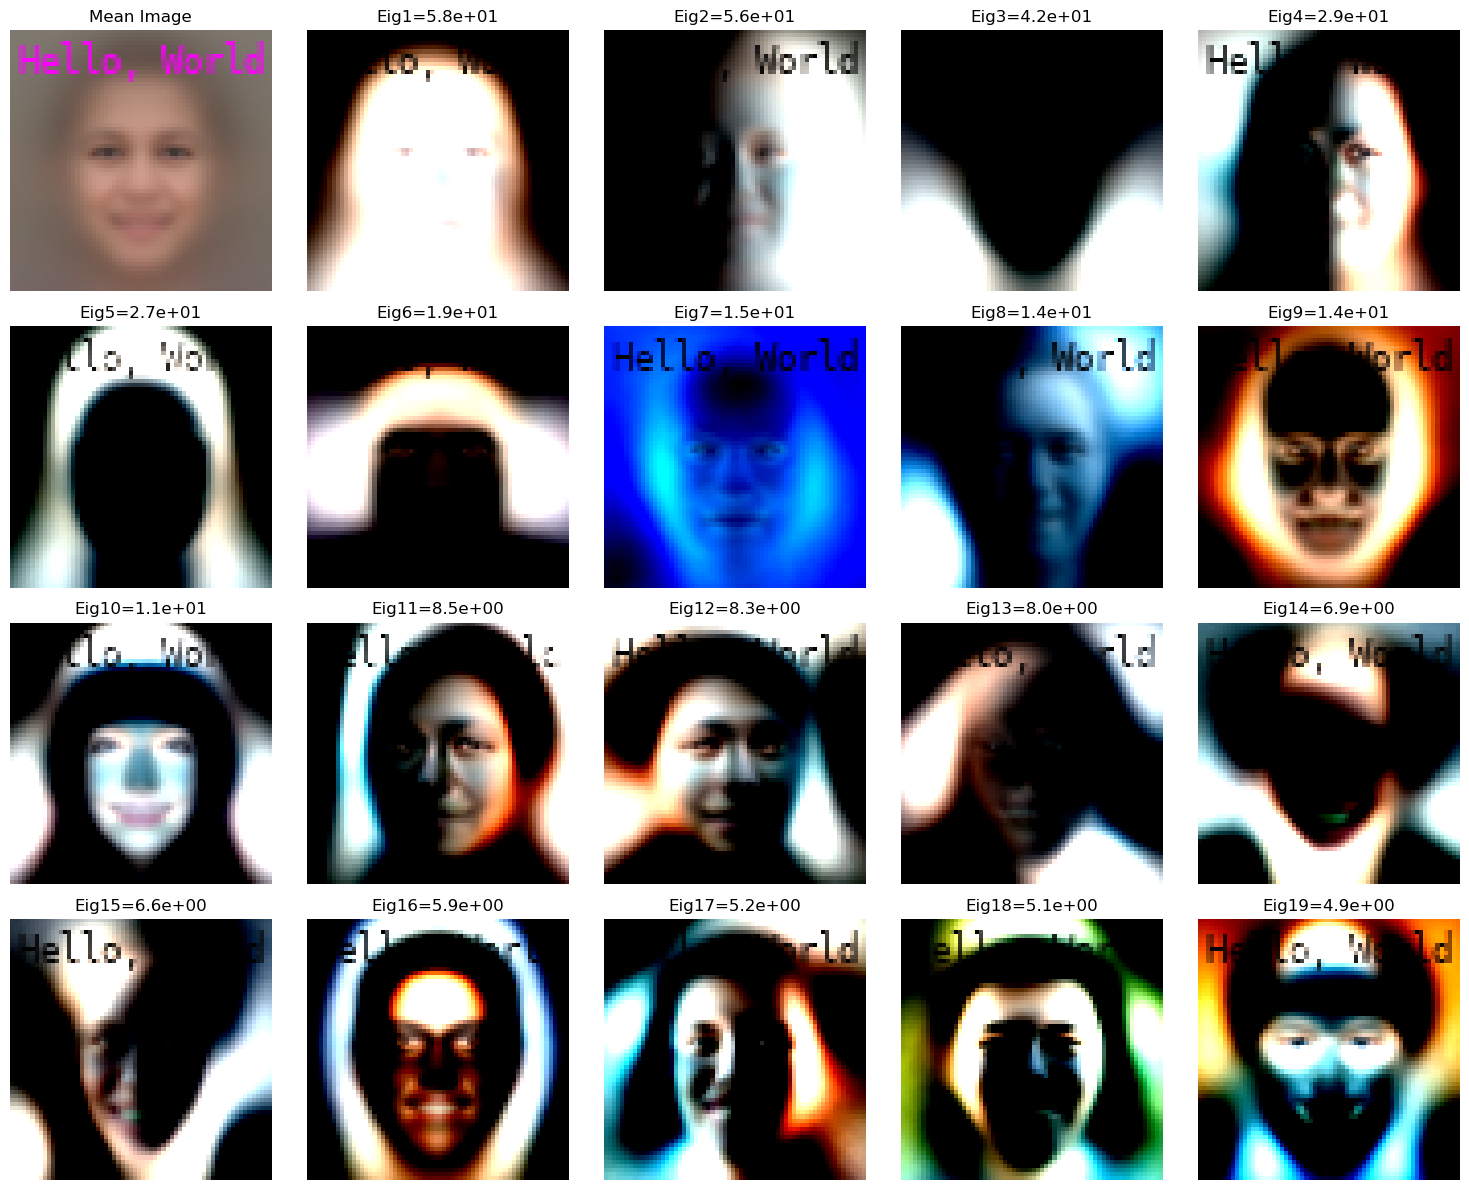

In [120]:
plot_eigenvectors(img_mean, eigval, eigvec, range(1, 20), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

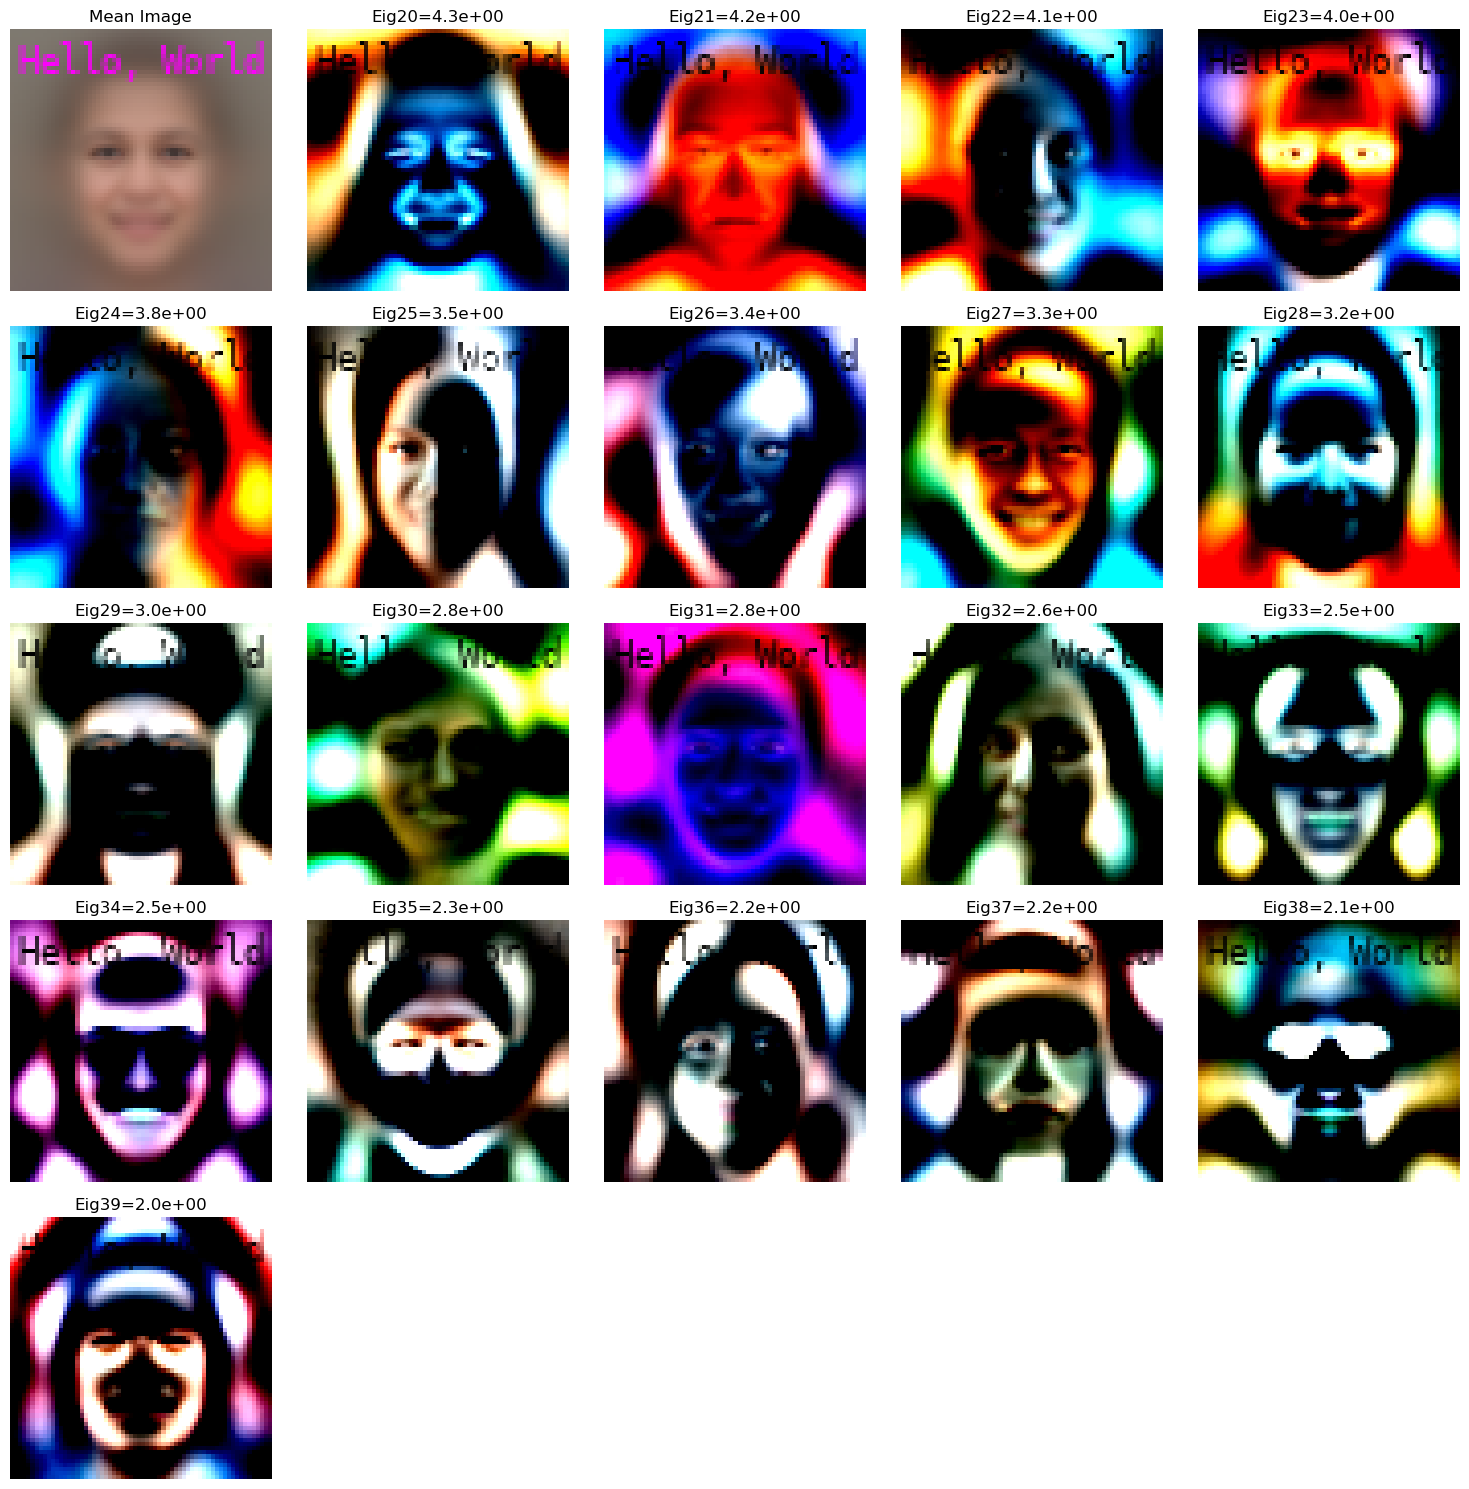

In [121]:
plot_eigenvectors(img_mean, eigval, eigvec, range(20, 40), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

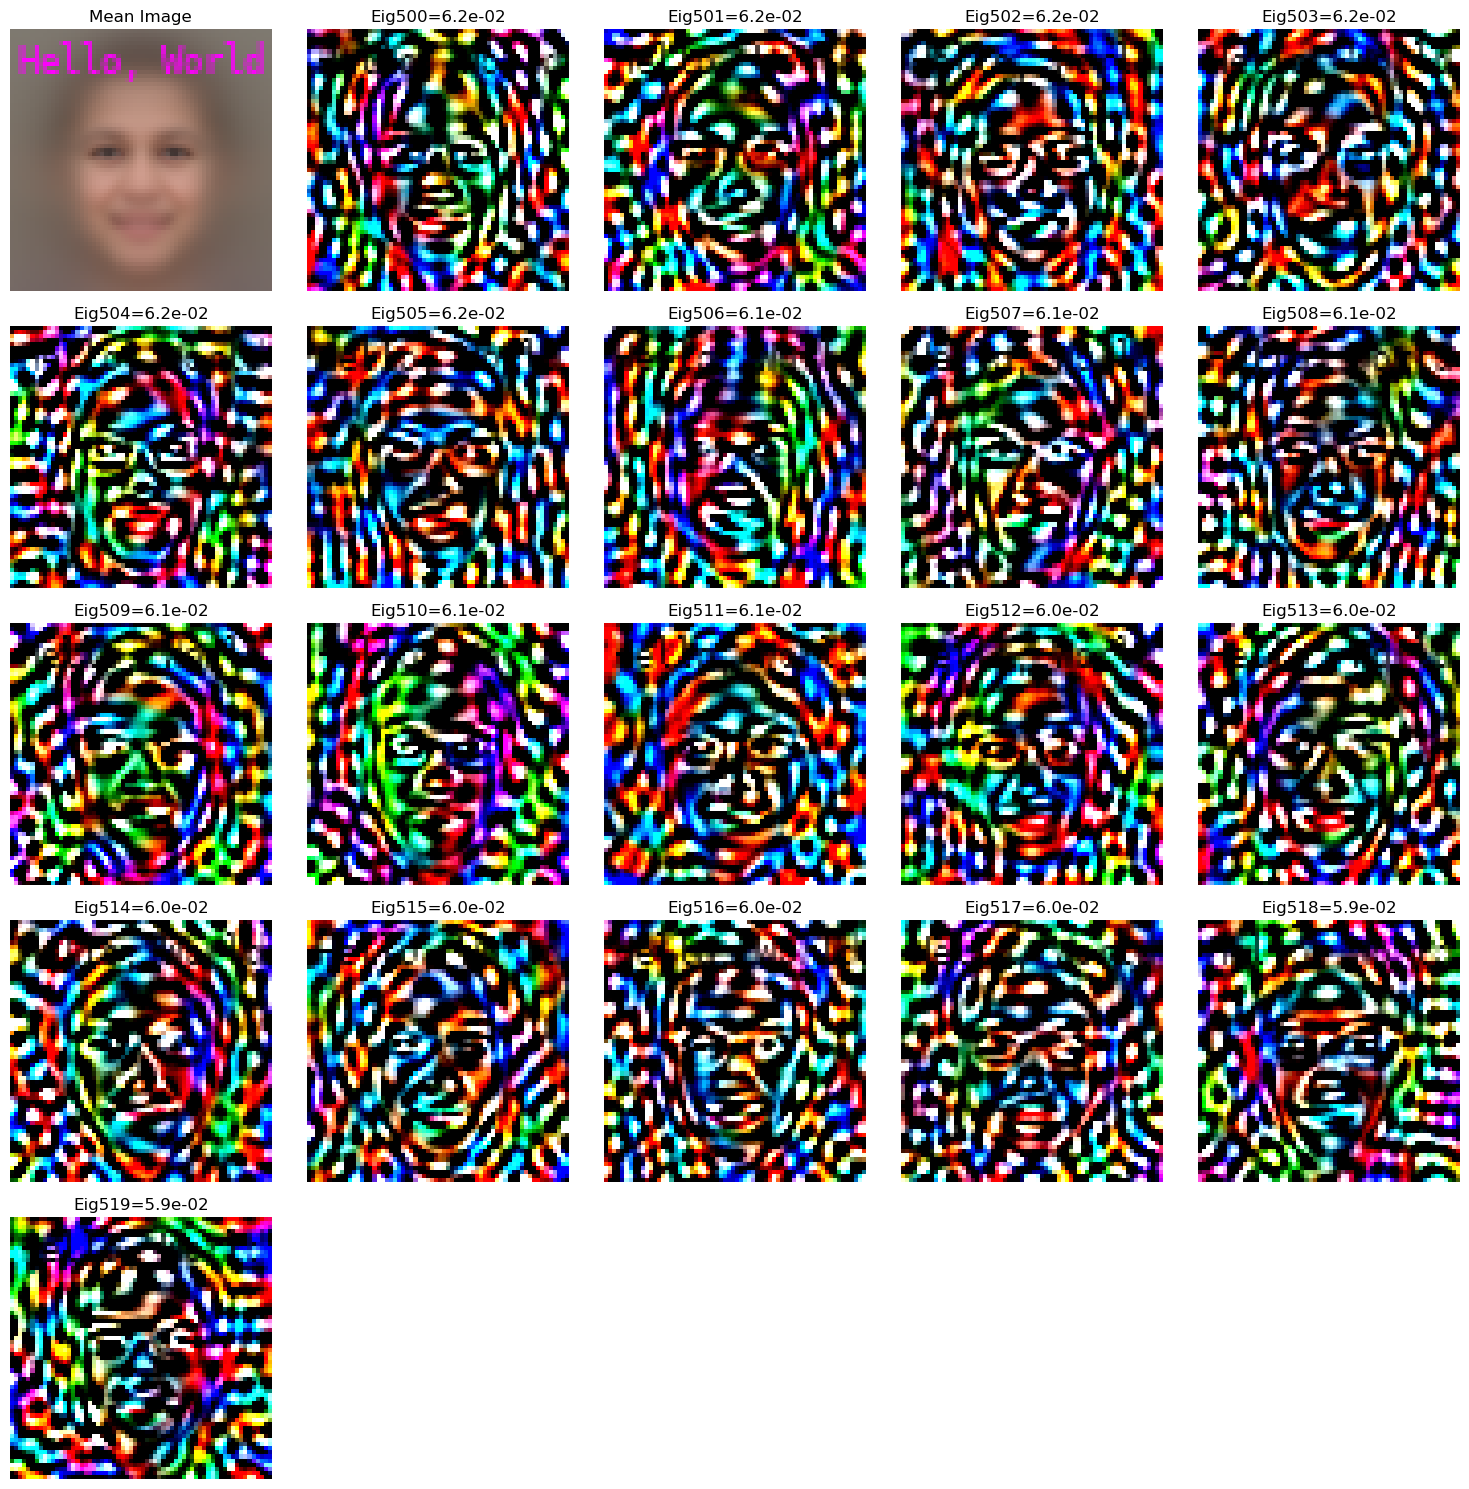

In [122]:
plot_eigenvectors(img_mean, eigval, eigvec, range(500, 520), img_shape=(3, 64, 64))

### Add text

In [125]:
import pickle as pkl
import random
import nltk
from nltk.corpus import words
# Download word list if not already downloaded
nltk.download('words')
word_list = words.words()

[nltk_data] Downloading package words to
[nltk_data]     /n/home12/binxuwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [126]:
# create a new dataset with fixed text on top 
text_color = (255, 0, 255)  # Black color in RGB
# Use default font since Arial.ttf may not be available
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
face_text_img_col = []
text_list = []
for img_id in trange(len(dataset)):
    word = random.choice(word_list)
    img = Image.fromarray(dataset[img_id][0].transpose(1,2,0))
    # add text to the image
    draw = ImageDraw.Draw(img)
    xpos = np.random.randint(2, 10)
    ypos = np.random.randint(2, 10)
    draw.text((xpos, ypos), word, fill=text_color, font=font)
    # Convert PIL image back to tensor format
    img_tensor = torch.tensor(np.array(img)).permute(2,0,1) / 255.0
    # dataset[img_id] = (img_tensor, dataset[img_id][1])
    face_text_img_col.append(img_tensor)
    text_list.append(word)

face_text_img_tsr = torch.stack(face_text_img_col)
# Save the modified dataset
wordimg_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset"
save_path = join(wordimg_root, "ffhq-64x64-random_word_jitter2-8.pt")
torch.save(face_text_img_tsr, save_path)
print(f"Saved modified dataset to {save_path}")
pkl.dump(text_list, open(join(wordimg_root, "ffhq-64x64-random_words_jitter2-8_words.pkl"), "wb"))


100%|██████████| 70000/70000 [00:33<00:00, 2067.54it/s]


Saved modified dataset to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/ffhq-64x64-random_word_jitter2-8.pt


In [136]:
img_mean, eigval, eigvec = compute_pca_stats(face_text_img_tsr, device="cuda", svd_lowrank=True, k=6000)

Mean shape: torch.Size([12288])
Mean value range: [0.20, 0.81]
Covariance eigval range: [0.00, 165.32]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

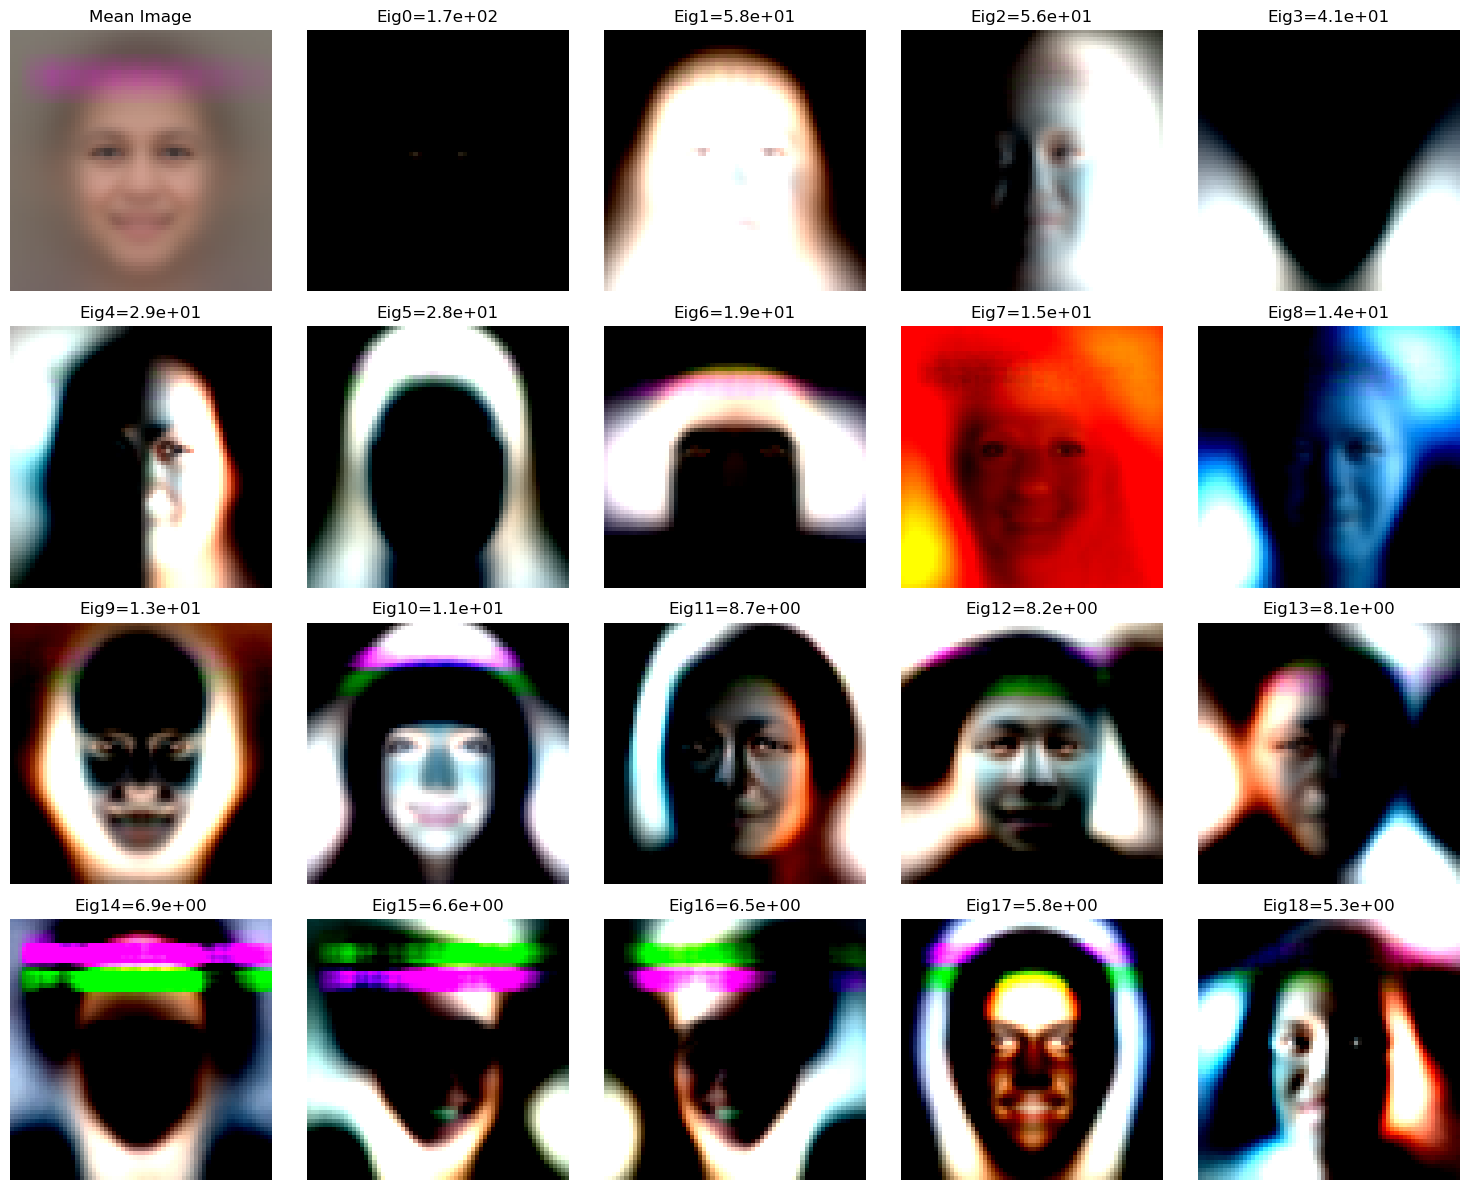

In [128]:
plot_eigenvectors(img_mean, eigval, eigvec, range(0, 19), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

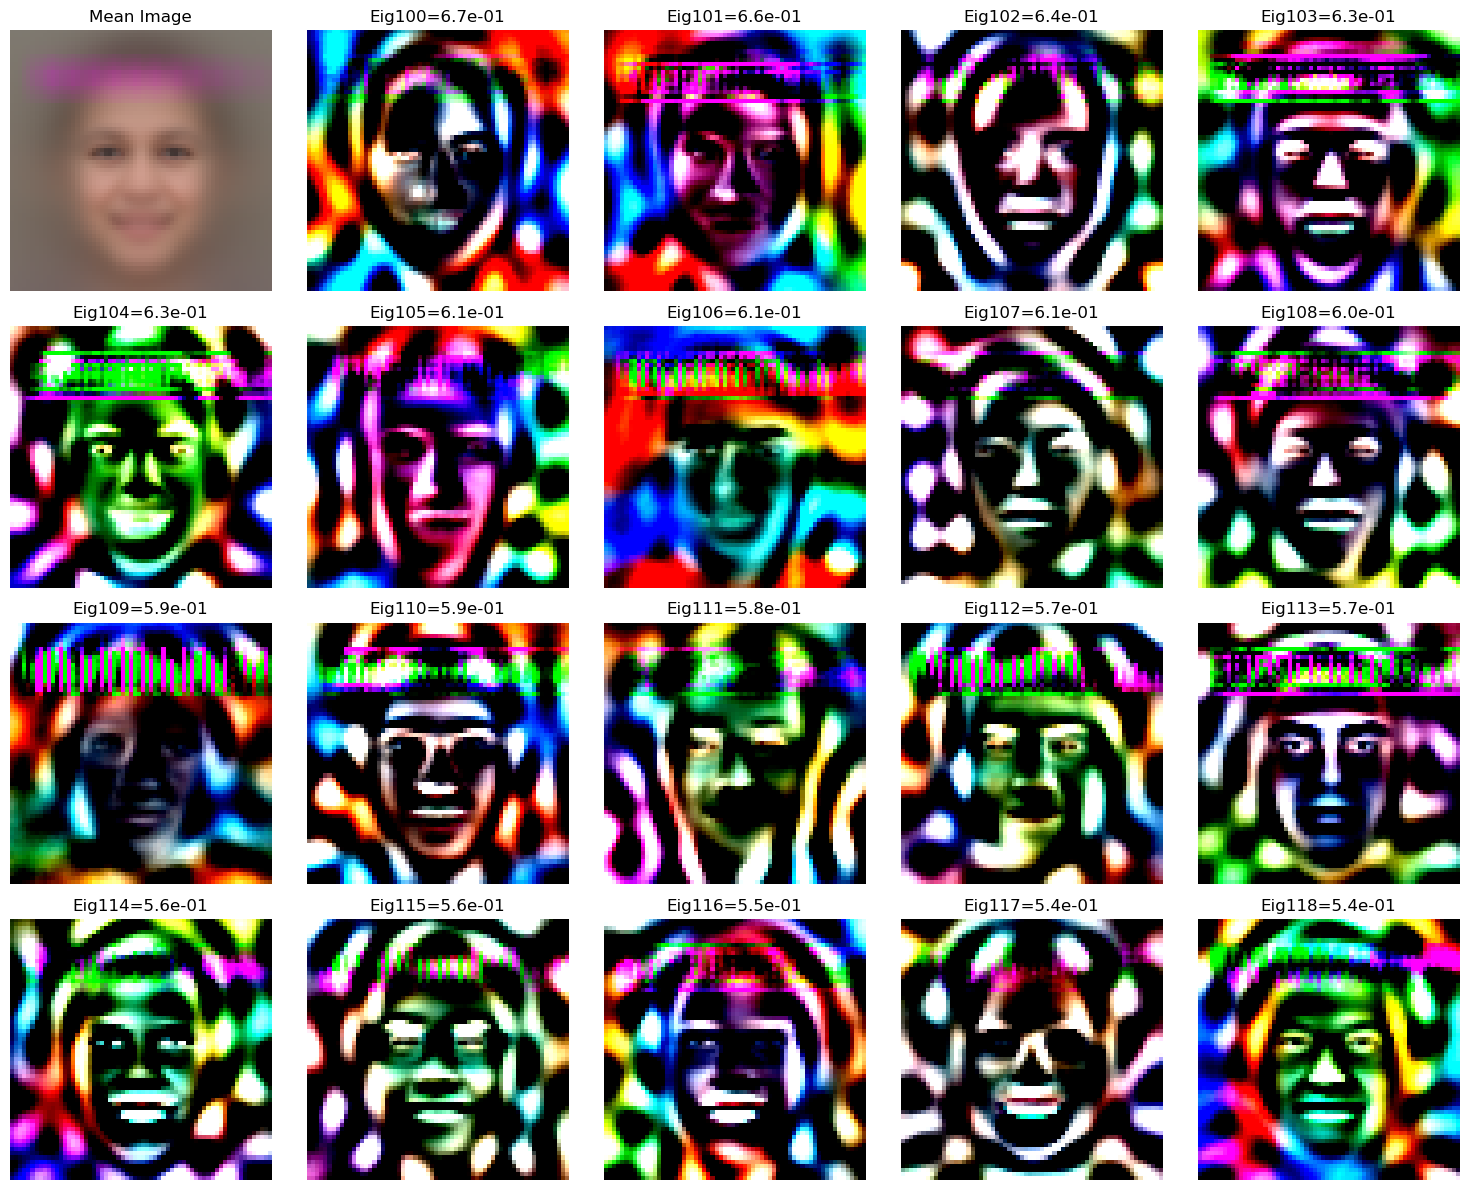

In [129]:
plot_eigenvectors(img_mean, eigval, eigvec, range(100, 119), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

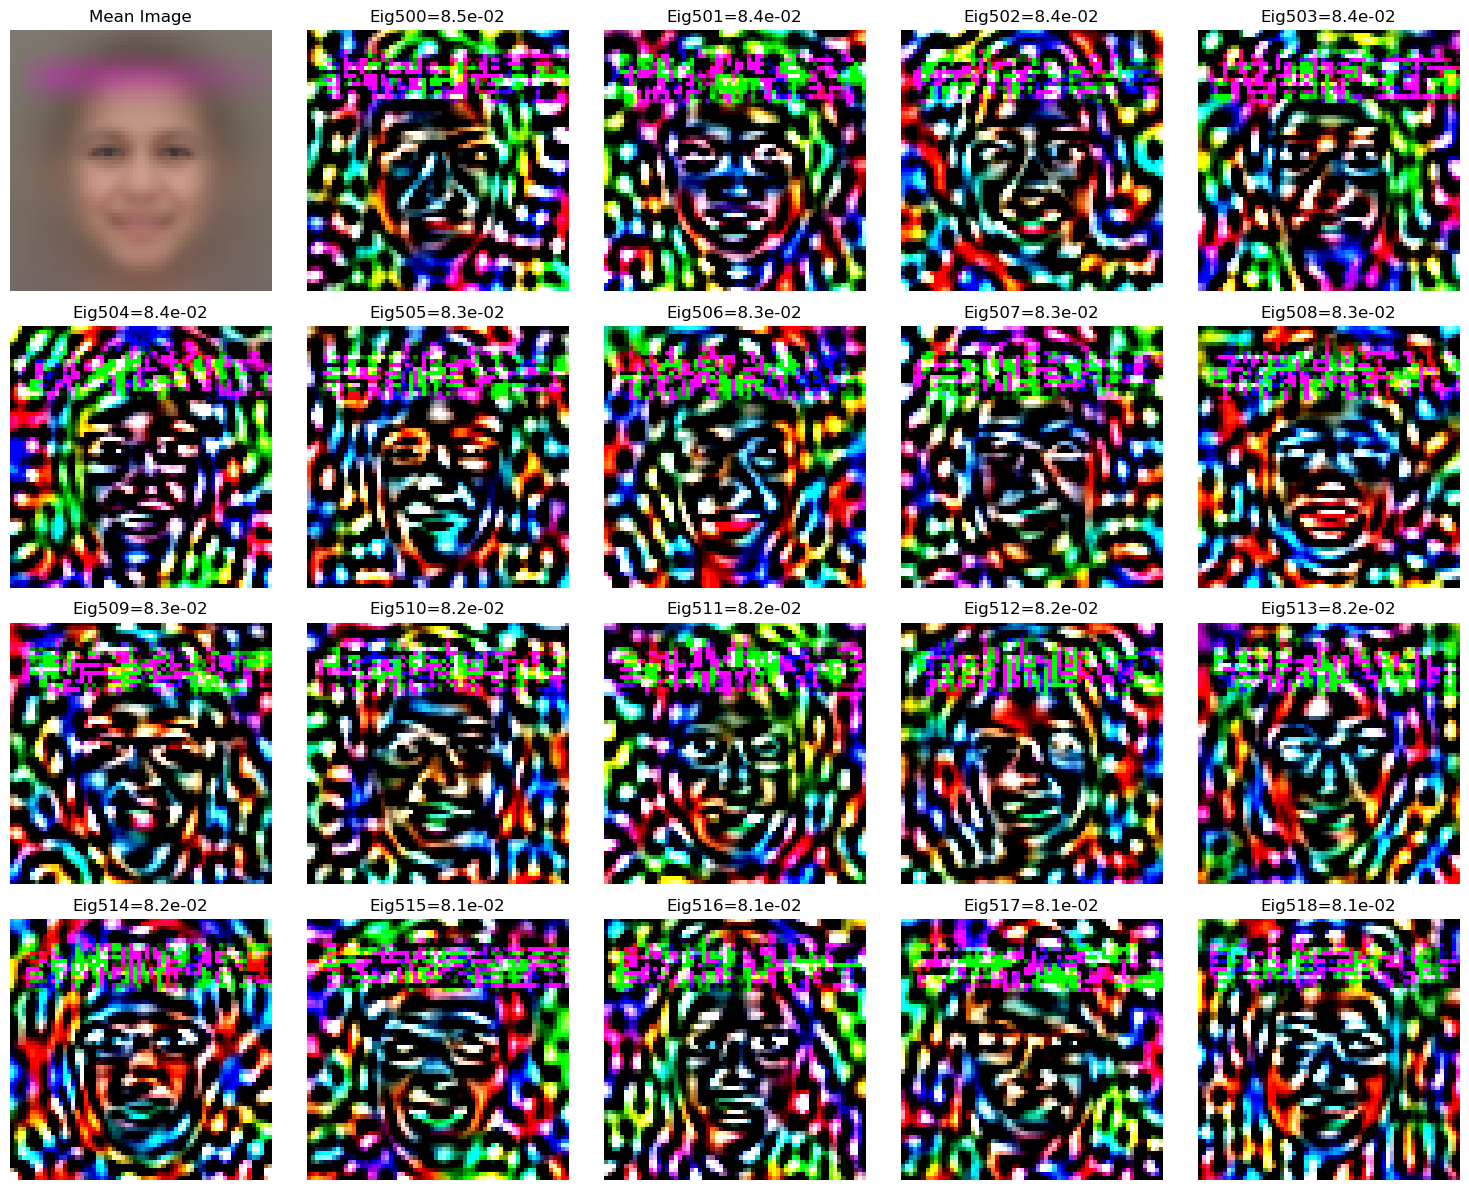

In [130]:
plot_eigenvectors(img_mean, eigval, eigvec, range(500, 519), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

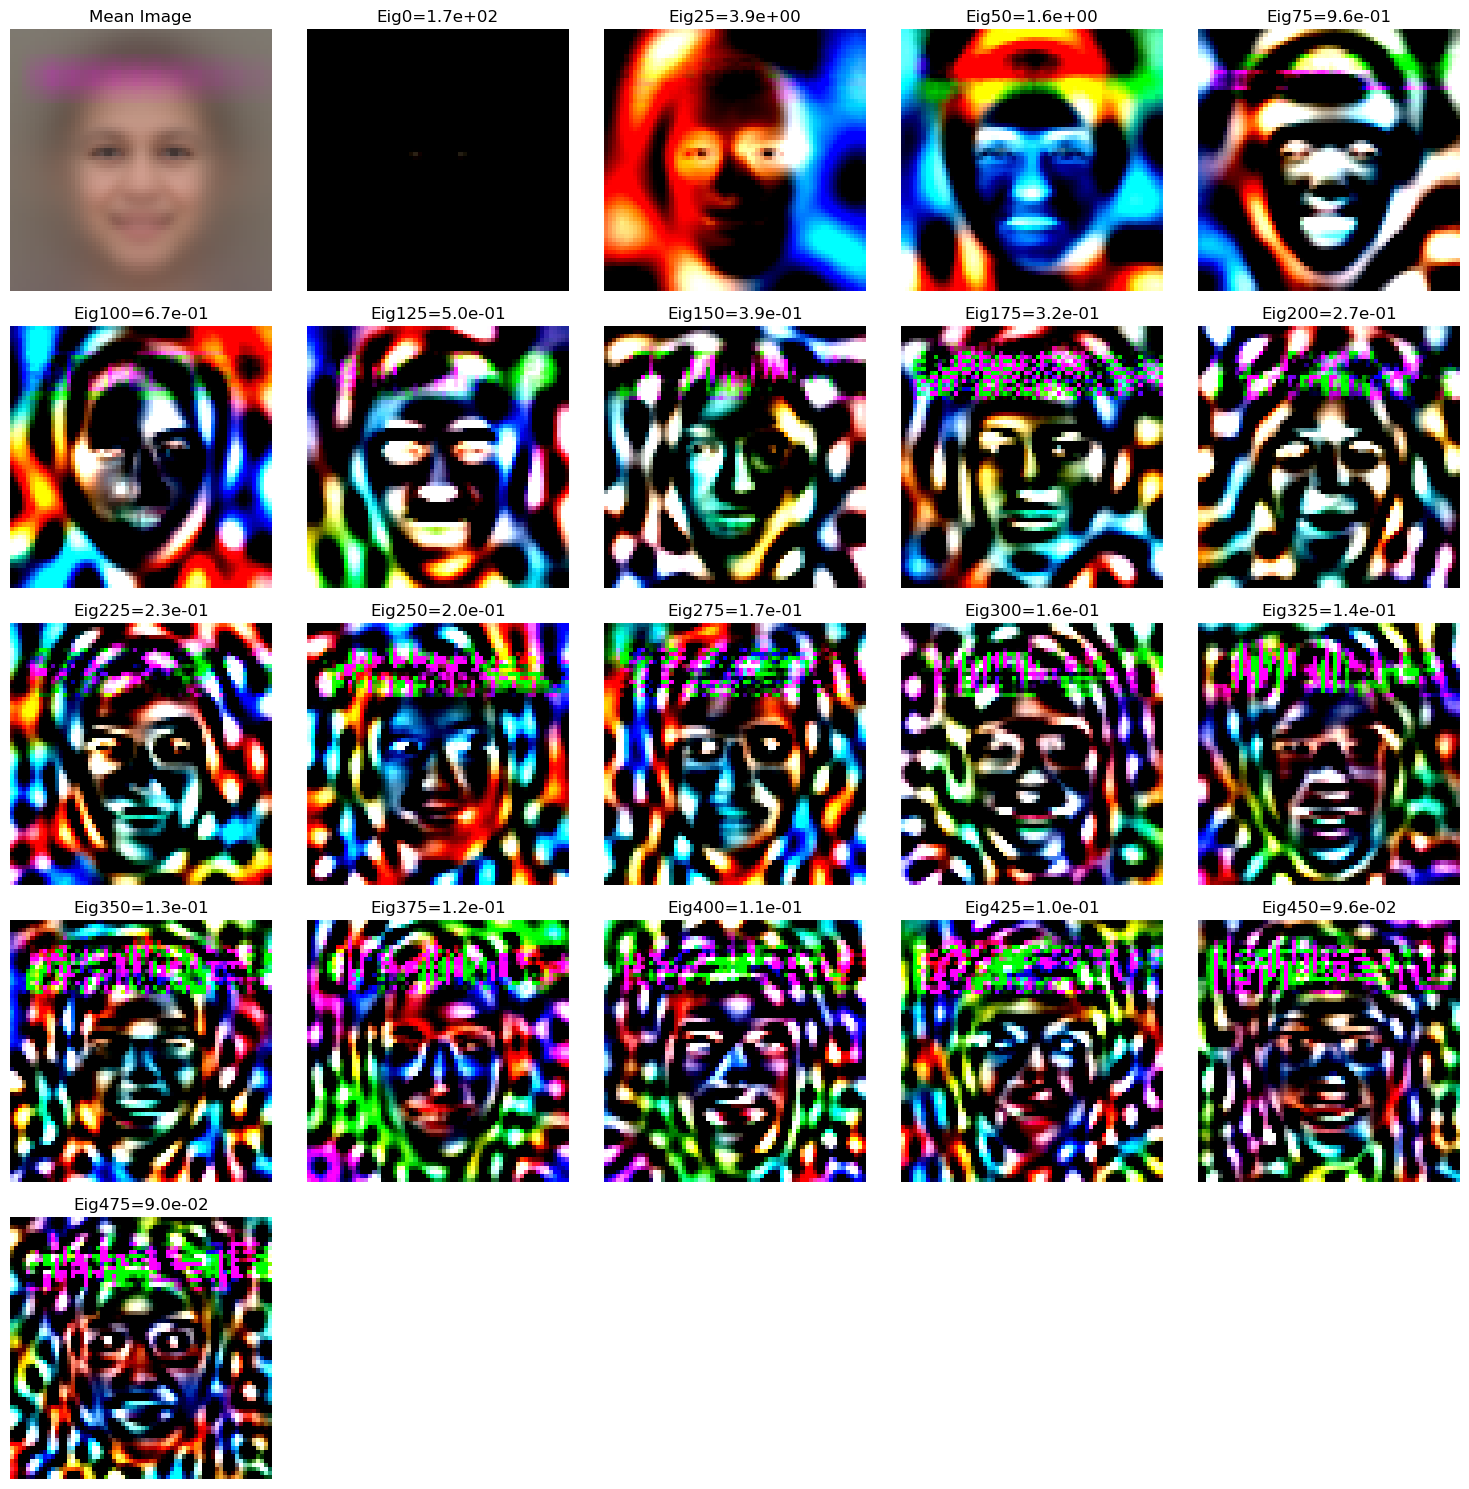

In [132]:
plot_eigenvectors(img_mean, eigval, eigvec, range(0, 499, 25), img_shape=(3, 64, 64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

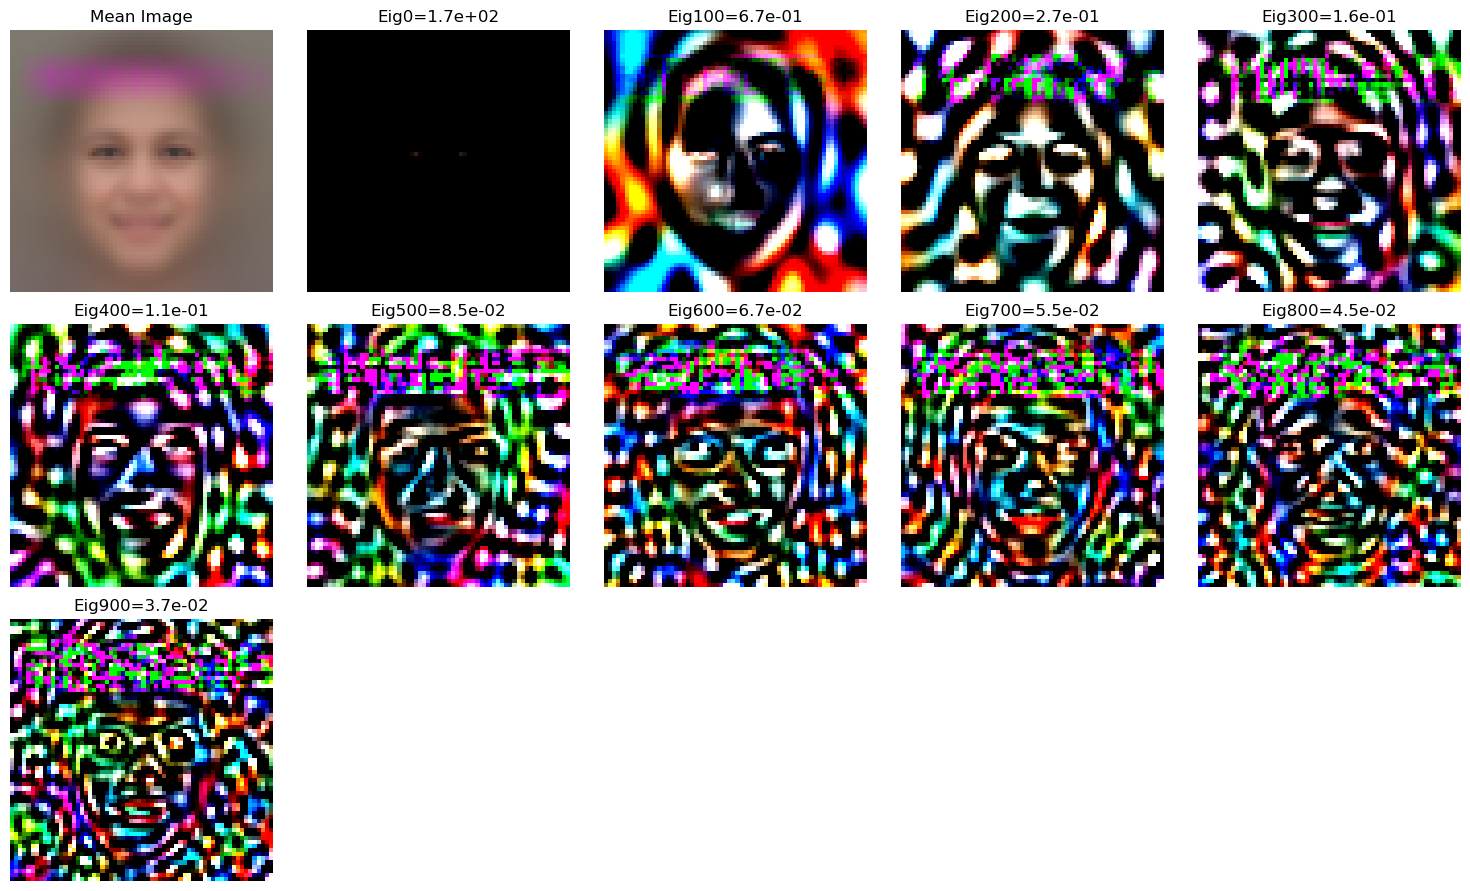

In [133]:
plot_eigenvectors(img_mean, eigval, eigvec, range(0, 1000, 100), img_shape=(3, 64, 64))

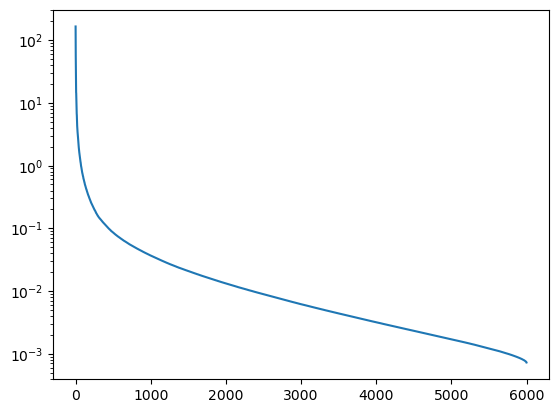

In [141]:
plt.plot(eigval.cpu())
plt.yscale("log")
plt.show()